ans = -32.070


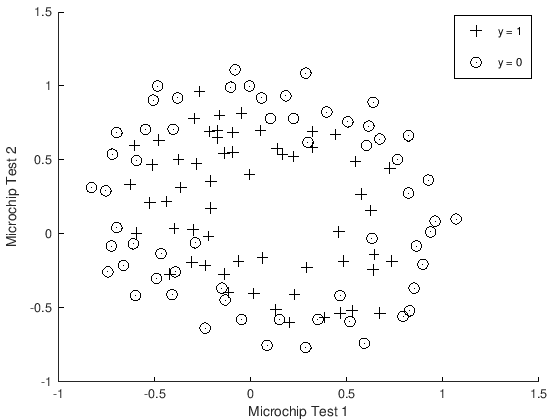

In [1]:
%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the second part
%  of the exercise which covers regularization with logistic regression.
%
%  You will need to complete the following functions in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
graphics_toolkit("gnuplot");
plot(1:1000)
graphics_toolkit("gnuplot");
clear ; close all; clc

%% Load Data
%  The first two columns contains the X values and the third column
%  contains the label (y).

data = load('ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

plotData(X, y);

% Put some labels
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;

In [2]:
%% =========== Part 1: Regularized Logistic Regression ============
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic
%  regression to classify the data points.
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros) - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.008475 
 0.018788 
 0.000078 
 0.050345 
 0.011501 
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [3]:
% Compute and display cost and gradient
% with all-ones theta and lambda = 10
test_theta = ones(size(X,2),1);
[cost, grad] = costFunctionReg(test_theta, X, y, 10);

fprintf('\nCost at test theta (with lambda = 10): %f\n', cost);
fprintf('Expected cost (approx): 3.16\n');
fprintf('Gradient at test theta - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');


Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.346045 
 0.161352 
 0.194796 
 0.226863 
 0.092186 
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


ans = -32.657
Train Accuracy: 83.898305
Expected accuracy (with lambda = 1): 83.1 (approx)


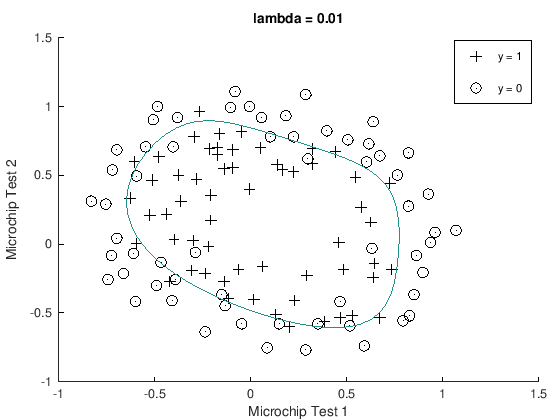

In [4]:
%% ============= Part 2: Regularization and Accuracies =============
%  Optional Exercise:
%  In this part, you will get to try different values of lambda and
%  see how regularization affects the decision coundart
%
%  Try the following values of lambda (0, 1, 10, 100).
%
%  How does the decision boundary change when you vary lambda? How does
%  the training set accuracy vary?
%

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 0.01;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');